We have a *collection of datasets* that refer to some common subject. We can organize the data organized in a tabular format, where each dataset is a column of data. Datsets are indexed, starting from 0. For instance, if data refers to countries, dataset 0 is a time period, dataset 1 is a economic value associated to the time period, and dataset 2 is a population value. Each column / dataset only takes numeric values.

The class `DataManager` stores the datasets using a tabular format as a **list of lists.** Data can be passed as an input list of lists or as a **CVS file**. The class offers a number of methods to access and modify the data, as well as to perform basic *statistical manipulation* and *graphical display* of the datasets.


In [254]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import random

class DataManager:
    
    def __init__(self, data_list=None, csv_file=None):
        '''Initial data can be provided by a list or by a csv_file. 
            A number of checks are made to ensure that inputs are correct.
            ...
        '''
        
        # Data can be passed as a list/tuple or lists/tuples 
        #
        if data_list != None:
                self.data = data_list.copy() 
                self.dataset_num = len(self.data)
                self.error_file = False
                self.error_args = False
        #
        # Data can be read from a csv file
        #
        elif csv_file != None:
            try:                          
                f_csv = open(csv_file)   
            except:
                print('File', csv_file, 'cannot be opened!')
                self.error_file = True
                return
            else:
                self.error_file = False
                self.error_args = False
            
                csv_reader = csv.reader(f_csv)
                
                # The cvs file is supposed to have a header, which is read to 
                # know the number of fields / datasets
                
                header = next(csv_reader)
                self.dataset_num = len(header)
                    
                self.data = [[]] * self.dataset_num
                for i in range(self.dataset_num):
                    self.data[i] = []
            
                for r in csv_reader:  
                    for i in range(self.dataset_num):
                        self.data[i].append(float(r[i]))
            finally:
                f_csv.close()
        #
        # If we get here, the arguments were wrong
        else:
            print('Wrong arguments to the initializer!')
            self.error_args = True
    
    def add_data(self, dataset, new_data):
        ''' Takes as input a tuple/list of new data and adds it to the specified dataset'''
        self.data[dataset].extend(new_data)
        
    def get_data_num(self, dataset):
        '''Returns the current number of entries in the specified dataset'''
        return len(self.data[dataset])
        
    def print_data(self, dataset):
        '''Prints the set of raw data in dataset, no formatting'''
        print(self.data[dataset])
        
    def get_number_of_datasets(self):
        return self.dataset_num
    
    def get_data(self, dataset):
        '''Returns a list with with all the data in dataset, unsorted'''
        return self.data[dataset]
    
    
    def remove_data(self, to_remove, dataset):
        '''Takes a tuple/list of entries to_remove and removes it from dataset, 
        if the entry exists.'''
        for d in to_remove:
            if d in self.data[dataset]:
                self.data[dataset].pop(d)
    
    def is_file_error(self):
        return self.error_file
    
    def is_args_error(self):
        return self.error_args
    
    def get_average(self, dataset):
        '''Returns the arithmetic average of the data in dataset.'''
        if len(self.data[dataset]) == 0:
            return 0
        avg = sum(self.data[dataset]) / len(self.data[dataset])
        
        return avg
    
    def get_standard_deviation(self, dataset):
        '''Returns the standard deviations of the data in dataset.'''
        if len(self.data[dataset]) == 0:
            return 0
        std = 0
        avg = self.get_average(dataset)
        for d in self.data[dataset]:
            std += (d - avg) * (d - avg)   
        return math.sqrt(std / len(self.data[dataset]))
    
    def get_median(self, dataset):
        d = sorted(self.data[dataset])
        return d[(len(d)//2)]

    def get_linear_correlation(self, dataset1, dataset2):
        d1_avg = self.get_average(dataset1)
        d2_avg = self.get_average(dataset2)
        d1_std = self.get_standard_deviation(dataset1)
        d2_std = self.get_standard_deviation(dataset2)
        c = 0
        for i in range(len(self.data[dataset1])):
            t1 = (self.data[dataset1][i] - d1_avg) / d1_std
            t2 = (self.data[dataset2][i] - d2_avg) / d2_std
            c +=  t1 * t2 
        return c / (len(self.data[dataset1])-1)
        
        
    def plot_dataset(self, dataset, xlabel='', ylabel='', title='', color='b'):
        plt.figure() # creates a new figure, it could be invoked with figure(n) to recall figure n later on
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)   
        plt.plot(self.data[dataset], color=color)
        plt.show()
            
    def plot_multiple_datasets(self, dataset_list, xlabel='', ylabel='', title=''):
        plt.figure() # creates a new figure, it could be invoked with figure(n) to recall figure n later on
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)  
        for i in dataset_list:
            plt.plot(self.data[i])
        plt.show()
            
            
    def scatter_plot(self, dataset1, dataset2, xlabel='', ylabel='', title='',
                     marker='.', color='r', size=6):
        plt.figure()
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)   
        plt.scatter(self.data[dataset1], self.data[dataset2], marker=marker, 
                        s=size, color=color)
        
    def histogram(self, nbins, dataset, title='', color='b'):
        plt.figure()
        plt.title(title)
        hist_data = plt.hist(self.data[dataset], nbins, color=color)
        #print(hist_data)
        freq_bin_data = []
        for i in range(nbins):
            freq_bin_data.append([hist_data[1][i], hist_data[1][i+1], hist_data[0][i]])

        return freq_bin_data
    


As a first step, let's create a *new class object* and read the data from a **CSV file** that contains 3 datasets, and let's make a general inspection of the data 

In [255]:
data = DataManager(csv_file='csv/price_list.csv')

if data.is_file_error() or data.is_args_error():
   print("Input correct values for the constructor")
else:
    print('Number of datasets:', data.get_number_of_datasets())
    for d in range(data.get_number_of_datasets()):
        print('\nNumber of data entries in dataset {}:'.format(d))
        data.print_data(d)


Number of datasets: 3

Number of data entries in dataset 0:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

Number of data entries in dataset 1:
[0.708478, 0.6473685772450384, 0.6011102363391411, 0.5627559594800667, 0.5403872534385242, 0.5170663096940814, 0.5786329632300619, 0.5280202494048907, 0.5377961694978812, 0.5248743180570329, 0.5863961707910175, 0.5608914101499013, 0.5646960863499731, 0.526208832593333, 0.440739328068094, 0.4095442253498885, 

The next step is to gather more precise information about the data, therefore, let's use afew of the methods computing **statistical indicators** to get some quantitative view on the different datasets

In [256]:
for d in range(data.get_number_of_datasets()):
    print('Dataset {}:'.format(d))
    print('   Average value: {:.3f}'.format(data.get_average(d)))
    print('   Standard deviation: {:.3f}'.format(data.get_standard_deviation(d)))
    print('   Median: {:.3f}'.format(data.get_median(d)))

Dataset 0:
   Average value: 50.500
   Standard deviation: 28.866
   Median: 51.000
Dataset 1:
   Average value: 0.432
   Standard deviation: 0.078
   Median: 0.418
Dataset 2:
   Average value: 0.997
   Standard deviation: 0.084
   Median: 0.995


Next descriptive step, in order to gather more insights, consists in representing the data in a graphical manner. Let's start by **plotting each dataset individually**. Remember that the first dataset is a set of contiguos time periods in this case.

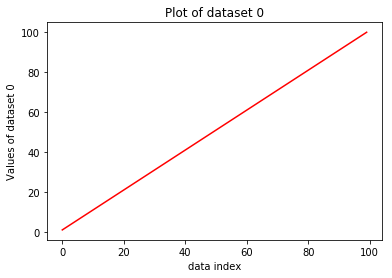

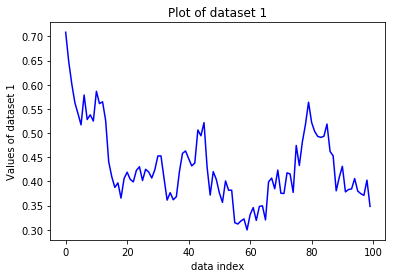

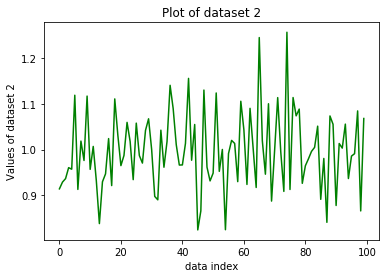

In [257]:
color_dict = {0:'r', 1:'b', 2:'g'}
for d in range(data.get_number_of_datasets()):
    ylabel = 'Values of dataset ' + str(d)
    title = 'Plot of dataset ' + str(d)
    data.plot_dataset(d, xlabel='data index', ylabel=ylabel, title=title, 
                      color= color_dict[d])

We can also **plot multiple datasets together!** However, the first dataset (0) is a set of contiguos time periods in this case, let's only plot the second and the third datasets.

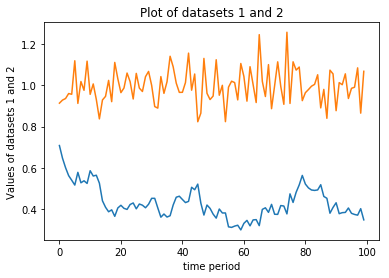

In [258]:
ylabel = 'Values of datasets 1 and 2'
title = 'Plot of datasets 1 and 2'
data.plot_multiple_datasets([1, 2], xlabel='time period', ylabel=ylabel, title=title)

Are there any correlations between the datasets? Let's investigate this by using the **linear correlation** method and by plotting a **scatter plot**

In [259]:
print('Value of linear correlation between datasets 1 and 2 is: {:.4f}'.format(
       data.get_linear_correlation(1,2)))


Value of linear correlation between datasets 1 and 2 is: -0.3233


The measured linear correlation is quite small and with negative slope, let's verify also graphically that this is actually the case

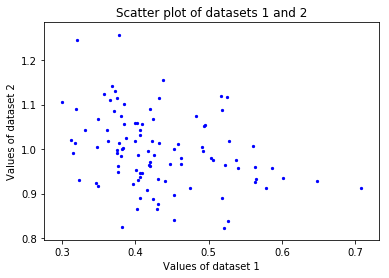

In [260]:
ylabel = 'Values of dataset 2'
xlabel = 'Values of dataset 1'
title = 'Scatter plot of datasets 1 and 2'
data.scatter_plot(1,2, xlabel=xlabel, ylabel=ylabel, title=title, 
                  marker='o', size=5, color='b')


In [261]:
# Many different markers are available for the shape of the data points
#    =============    ===============================
#    character        description
#    =============    ===============================
#    ``'.'``          point marker
#    ``','``          pixel marker
#    ``'o'``          circle marker
#    ``'v'``          triangle_down marker
#    ``'^'``          triangle_up marker
#    ``'<'``          triangle_left marker
#    ``'>'``          triangle_right marker
#    ``'1'``          tri_down marker
#    ``'2'``          tri_up marker
#    ``'3'``          tri_left marker
#    ``'4'``          tri_right marker
#    ``'s'``          square marker
#    ``'p'``          pentagon marker
#    ``'*'``          star marker
#    ``'h'``          hexagon1 marker
#    ``'H'``          hexagon2 marker
#    ``'+'``          plus marker
#    ``'x'``          x marker
#    ``'D'``          diamond marker
#    ``'d'``          thin_diamond marker
#    ``'|'``          vline marker
#    ``'_'``          hline marker
#    =============    ===============================

An histogram provides a rich description of the data, since it approximates the underlying probabilistic distribution of the data

[1] Value interval [0.300:0.320] - Number of values: 5
[2] Value interval [0.320:0.341] - Number of values: 3
[3] Value interval [0.341:0.361] - Number of values: 5
[4] Value interval [0.361:0.382] - Number of values: 15
[5] Value interval [0.382:0.402] - Number of values: 11
[6] Value interval [0.402:0.422] - Number of values: 16
[7] Value interval [0.422:0.443] - Number of values: 11
[8] Value interval [0.443:0.463] - Number of values: 7
[9] Value interval [0.463:0.484] - Number of values: 2
[10] Value interval [0.484:0.504] - Number of values: 5
[11] Value interval [0.504:0.525] - Number of values: 6
[12] Value interval [0.525:0.545] - Number of values: 5
[13] Value interval [0.545:0.565] - Number of values: 4
[14] Value interval [0.565:0.586] - Number of values: 1
[15] Value interval [0.586:0.606] - Number of values: 2
[16] Value interval [0.606:0.627] - Number of values: 0
[17] Value interval [0.627:0.647] - Number of values: 0
[18] Value interval [0.647:0.668] - Number of values:

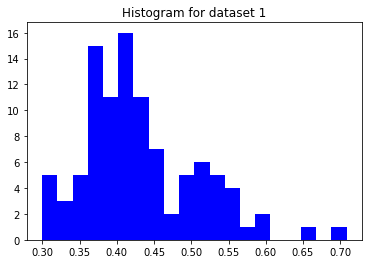

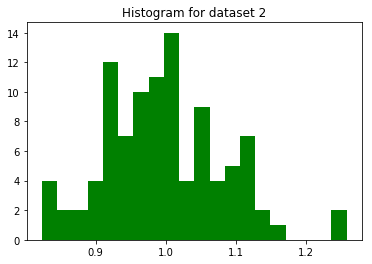

In [262]:
nbins = 20
for dataset in (1,2):
    title = 'Histogram for dataset ' + str(dataset)
    hist_data = data.histogram(nbins, dataset, title, color=color_dict[dataset])
    for i in range(nbins):
        print('[{:d}] Value interval [{:.3f}:{:.3f}] - Number of values: {:.0f}'.format(
            i+1, hist_data[i][0], hist_data[i][1], hist_data[i][2]))

Let's keep exploring the use of data generation and graphical visualization for getting information about data, or generate data according to some *probabilistic model*

The first of the following two functions generate the data for *plotting a Gaussian*. The second function generates pairs of *linearly correlated values* (with a random linear coefficient and Gaussian noise) over a certain interval.

Note the use of the method `arange()` from the module **numpy**, a major module for numerical analysis and manipulation. `arange()` has the same syntax as `range()` but it allows to specify *floats* in the ranges and returns floats! 

Note that a few cells below we show a smart(er) use of numpy to apply a function to a range of values directly!

In [263]:
def gen_gaussian(m, s, xinf, xsup, dx):
    g = [[], []]
    for x in np.arange(xinf, xsup, dx):
        g[0].append(x)
        g[1].append(1/math.sqrt(2 * math.pi * s) * math.exp(-((x - m)**2)/(2*s) ))
    return(g)

def gen_linearly_correlated_pairs(xinf, xsup, dx, variance=1):
    slope = random.uniform(xinf, xsup)
    lc = [[], []]
    for x in np.arange(xinf, xsup, dx):
        lc[0].append(x)
        lc[1].append(random.gauss(slope * x, variance))
    return lc
    

Let's use the generator of gaussian data and let's plot them. We should observe a nice Gaussian centered in 0 and with variance 2.

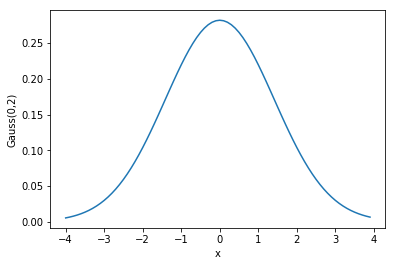

In [264]:
mean = 0
variance = 2
xmin = -4
xmax = 4
delta_x = 0.1
gaussian_values = gen_gaussian(mean, variance, xmin, xmax, delta_x)
plt.figure()
plt.xlabel('x')
plt.ylabel('Gauss(0,2)')
plt.plot(gaussian_values[0], gaussian_values[1])

Let's use now the generator of linearly correlated data and let's plot them. In this case we should observe a clear linear correlation.

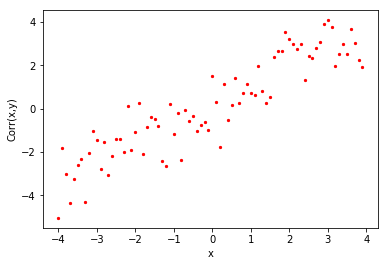

In [265]:
mean = 0
variance = 1
xmin = -4
xmax = 4
delta_x = 0.1
linearly_corr_values = gen_linearly_correlated_pairs(xmin, xmax, delta_x, variance)
plt.figure()
plt.xlabel('x')
plt.ylabel('Corr(x,y)')
plt.scatter(linearly_corr_values[0], linearly_corr_values[1], color='r', s=5)

One common question in data analisys is: *do the data follow a certain distribution?* A number of statistical tests are available to validate the hypothesis about the data. In absence of a test, one way to go is to plot the normalized histogram (`density` parameter set to `True`), that approximates the probability distribution of the data, and overlaps it with the distribution function of the hypothesis. 

Are the data in the dataset 2 drawn from a Gaussian population of data? Let's try to check it according to what said above.

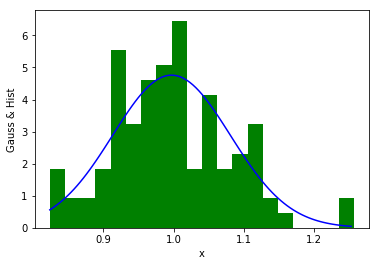

In [266]:
dataset = 2
title = 'Histogram and guessed Gaussian distribution for dataset ' + str(dataset)
plt.figure()
plt.xlabel('x')
plt.ylabel('Gauss & Hist')
plt.hist(data.get_data(dataset), nbins, density=True, color=color_dict[dataset])

average = data.get_average(dataset)
variance = (data.get_standard_deviation(dataset)) ** 2
xmin = min(data.get_data(dataset))
xmax = max(data.get_data(dataset))
delta_x = (xmax - xmin) / 100
#print(xmin, xmax, delta_x)
gaussian_values = gen_gaussian(average, variance, xmin, xmax, delta_x)

plt.plot(gaussian_values[0], gaussian_values[1], color='b')


The histogram method can be used to plot the **cumulative probability distribution.**
This requires setting to `True` both the `cumulative` and `density` parameters

(array([0.03, 0.04, 0.06, 0.07, 0.1 , 0.12, 0.18, 0.27, 0.31, 0.4 , 0.45,
        0.52, 0.6 , 0.69, 0.7 , 0.74, 0.81, 0.83, 0.87, 0.9 , 0.95, 0.97,
        0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.  ]),
 array([0.82370885, 0.83815854, 0.85260824, 0.86705793, 0.88150762,
        0.89595732, 0.91040701, 0.92485671, 0.9393064 , 0.95375609,
        0.96820579, 0.98265548, 0.99710517, 1.01155487, 1.02600456,
        1.04045425, 1.05490395, 1.06935364, 1.08380333, 1.09825303,
        1.11270272, 1.12715241, 1.14160211, 1.1560518 , 1.1705015 ,
        1.18495119, 1.19940088, 1.21385058, 1.22830027, 1.24274996,
        1.25719966]),
 <a list of 30 Patch objects>)

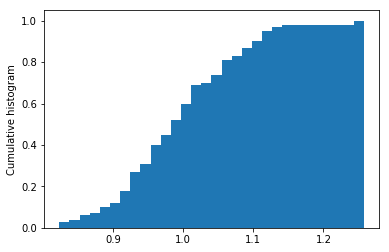

In [267]:
nbins = 30
dataset = 2
plt.ylabel('Cumulative histogram')
plt.hist(data.get_data(dataset), nbins, cumulative=True, density=True)

Sometimes we need to **plot a given function f(x)** to *see* what's going on there. Using `numpy` this is quite easy. 

The example below also shows the use of **legends** to label the different curves that might be present in the plot. Also, it shows how using numpy it is possible to apply a **mathematical function to a whole range of values**, e.g., `np(sin(x))`, where `x` is a list of values.

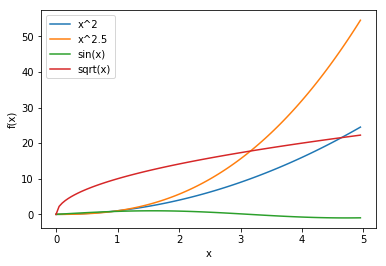

In [268]:
x = np.arange(0., 5, 0.05)
plt.figure()
plt.xlabel('x')
plt.ylabel('f(x)')
xx, = plt.plot(x, x**2, label='x^2')
xxx, = plt.plot(x, x**2.5, label='x^2.5')
sinx, = plt.plot(x, np.sin(x), label='sin(x)')
sqrtx, = plt.plot(x, 10*np.sqrt(x), label='sqrt(x)')
plt.legend(handles=[xx, xxx, sinx, sqrtx])